# Lifetime Utility Maximization
Lehner White, Luke Nelson, Rex McArther, Luke Nelson

In [30]:
from __future__ import division, print_function
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://seanwade.com/jupyter_3.css').read())

## Dynamic Programming

Many important problems involve finding the optimal solution to a problem. Examples of this range from finding the shortest path to best investment strategy. In computer science a powerful approach to solving this problem is *dynamic programming*. Dynamic programming can be defined as a method for solving complex problems by breaking them down in to simpler subproblems.

#### Steps for solving dynamic programming
 - Define subproblems
 - Determin recurence relation between these subproblems
 - recognize and solve the base case
 

For illustration we will use the canonical example for making change. For this problem we are given an amount of change, lets say 63 cents, and wish to represent it with the fewest coins possible. It is  possible to solve this problem in a variety of ways. The greedy solution to this problem is to start with the largest coin and switch coins until the correct change is made. This solution is gauranteed to work, however it is gready and does not provde the optimal number of coins.To solve this we can use recusrion to iterate through all the possible answers. To start we choose a base case and then find the best from there.

This  method can be seen in the code bellow:

In [51]:
def recursive_make_change(coinValueList,change):
    minCoins = change
    if change in coinValueList:
        return 1
    else:
        for i in [c for c in coinValueList if c <= change]:
            numCoins = 1 + recMC(coinValueList,change-i)
            if numCoins < minCoins:
                minCoins = numCoins
    return minCoins

In [55]:
%%time
print(recursive_make_change([1,5,10,25], 63))

6
CPU times: user 24.1 s, sys: 0 ns, total: 24.1 s
Wall time: 24.1 s


This is the correct answer! However, even for this simple problem it took around 24 seconds. This is because the recursion was called 67,716,925 times.

Dynamic programing improves this by offering a systematic solution to the problem. For the coin example it will start with making change for one cent and working forward. With this approach we are sure that we have the smallest number of coins as we build it up.

$$
\begin{split}   
\text{num_coins = min}
\begin{cases}
1 + \text{num_coins}(original amount - 1) \\
1 + \text{num_coins}(original amount - 5) \\
1 + \text{num_coins}(original amount - 10) \\
1 + \text{num_coins}(original amount - 25)
\end{cases}
\label{eqn_change}
\end{split}
$$

We use this formula above and also store previous computations with memoization. These together solve the problem much quicker.

### Problem 1

Use dynamic programing to solve the coin problem by completing the function make_change. Print the number of coins required for the optimal number of coins.

In [47]:
def make_change(coinValueList, change, minCoins ,coinsUsed):
    """ Provide optimal number of coins to make change.
    Args:
      coinValueList : (list) a list of all values of coins
      change : (int) the amount to break into change
      minCoins : (list) the stored min number of  coins
      coinsUsed : (list) a list of the coins used at the iteration
      
    Returns:
      minCoins : (int) the minimum number of coins
    """
    raise NotImplementedError

#### Solution:

In [64]:
def make_change(coinValueList, change, minCoins ,coinsUsed):
    """ Provide optimal number of coins to make change.
    Args:
      coinValueList : (list) a list of all values of coins
      change : (int) the amount to break into change
      minCoins : (list) the stored min number of  coins
      coinsUsed : (list) a list of the coins used at the iteration
      
    Returns:
      minCoins : (int) the minimum number of coins
    """
    for cents in range(change+1):
        coinCount = cents
        newCoin = 1
        for j in [c for c in coinValueList if c <= cents]:
            if minCoins[cents-j] + 1 < coinCount:
                coinCount = minCoins[cents-j]+1
                newCoin = j
        minCoins[cents] = coinCount
        coinsUsed[cents] = newCoin
    return minCoins[change]


amnt = 63
clist = [1,5,10,20,25]
coinsUsed = [0] * (amnt+1)
coinCount = [0] * (amnt+1)


print("Change for",amnt)
print(make_change(clist, amnt, coinCount, coinsUsed), "coins")
print("Coins:", end=" ")
coin = amnt
while coin > 0:
    thisCoin = coinsUsed[coin]
    print(thisCoin, end=" ")
    coin = coin - thisCoin

Change for 63
6 coins
Coins: 1 1 1 10 25 25 

## Next Section

### Problem 2

Capital steady state values: 
[ 0.12199033  0.24394515  0.36580446  0.48750399  0.60897491  0.73014358
  0.85093117  0.9712534   1.09102014  1.21013504  1.32849514  1.44599042
  1.56250337  1.67790851  1.79207185  1.90485034  2.01609134  2.12563193
  2.23329829  2.338905    2.44225428  2.54313519  2.6413228   2.73657728
  2.82864296  2.91724728  3.00209971  3.08289063  3.15929009  3.23094645
  3.29748508  3.35850681  3.41358639  3.46227079  3.50407745  3.53849238
  3.56496809  3.58292152  3.5917317   3.59073736  3.57923428  3.55647263
  3.52165395  3.47392809  3.4123899   3.33607565  3.24395932  3.1349486
  3.00788062  2.86151746  2.69454129  2.50554931  2.29304826  2.05544861
  1.79105845  1.49807686  1.17458698  0.81854854  0.42778997]
Labor steady state values: 
[ 0.52589973  0.52241219  0.518899    0.51535997  0.5117949   0.50820361
  0.5045859   0.50094158  0.49727045  0.49357232  0.48984698  0.48609423
  0.48231389  0.47850573  0.47466956  0.47080517  0.46691235  0.4629909
  0.45

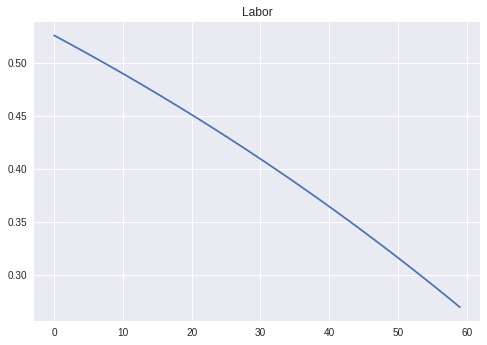

In [69]:
#Helper code
from scipy import optimize

labor_guess = .8
cap_guess = .1
error = 1.



def wage (kvector, lvector):
    market_k = np.sum(kvector)
    market_l = np.sum(lvector)
    
    w = (1-alpha)*A*((market_k)/market_l)**(alpha)
    return w

def rate (kvector, lvector): 
    market_k = np.sum(kvector)
    market_l = np.sum(lvector)
    
    r = (alpha)*A*(market_l/(market_k))**(1-alpha)
    return r

def cap(guess_vector):
    """
    This takes the Euler equations, and sets them equal to zero for an f-solve
    Remember that Keq was found by taking the derivative of the sum of the 
        utility functions, with respect to k in each time period, and that 
        leq was the same, but because l only shows up in 1 period, it has a
        much smaller term.

    ### Paramaters ###
    guess_vector: The first half is the intial guess for the kapital, and
        the second half is the intial guess for the labor
    """
    
    #equations for keq
    ks = np.zeros(periods)
    ks[1:] = guess_vector[:periods-1]
    ls  = guess_vector[periods-1:]
    kk  = ks[:-1]
    kk1 = ks[1:]
    kk2 = np.zeros(periods-1)
    kk2[:-1] = ks[2:]
    lk  = ls[:-1]
    lk1 = ls[1:]
    
    #equation for leq
    ll = np.copy(ls)
    kl = np.copy(ks)
    kl1 = np.zeros(periods)
    kl1[:-1] = kl[1:]
    w = wage(ks, ls)
    r = rate(ks, ls)
    keq = ((lk*w+(1.+r-delta)*kk - kk1)**-gamma - (beta*(1+r-delta)*(lk1*w+(1+r-delta)*kk1-kk2)**-gamma))
    leq = ((w*(ll*w + (1+r-delta)*kl-kl1)**-gamma)-(1-ll)**-sigma)
    error = np.append(keq, leq)

    return np.append(keq, leq)


# Prob 2
# This just solves for the steady in each year, by doing an individual f-solve

def cap_ss(years, beta, gamma, alpha, sigma, xi, epsilon, T, shock, guess_vector):
    """
    Solve the 1 dimensional (choose capital) lifetime utility problem for the steady state distribution
    Args:
        years: Number of years in workforce
        beta: Discount factor year over year
        gamma: I forgot, probably important
        alpha: Labor share of production in firms model
        sigma: Also forgot this
        xi: Convex combination constant
        epsilon: Tolerance for error before convergence
        T: Number of time periods to solve out to
        shock: How much to shock economy
        
    Returns: 

    """
    A = 1
    ssvalue = optimize.fsolve(cap, guess_vector)
    kbars = np.zeros(periods -1)
    kbars = ssvalue[:periods-1]
    lbars = np.zeros(periods)
    lbars = ssvalue[periods-1:]
    print('Capital steady state values: \n{}'.format(kbars))
    print('Labor steady state values: \n{}'.format(lbars))
    wbar =  wage(kbars, lbars)
    rbar = rate(kbars, lbars)
    print("Wage steady state: ", wbar)
    print("Rate stead state: ", rbar)
    Kss = np.sum(kbars)
    Lss = np.sum(lbars)
    print('Market Capital steady state: ', Kss)
    print('Market Labor steady state: ', Lss)
    K0 = Kss*shock
    kshock = kbars*shock
    return kbars, lbars
    
    
    
periods = 60
years = 60./periods
beta = .96**years
delta = 1-(1-.05)**years
gamma = 2.9
alpha = .35 # Labor Capital split in Cobb-Doublas
sigma = 2.9 
A = 1 # Production multiplier
xi = .5 # Convex combination constant
epsilon = 10e-9 # tolerance
T = 50 
shock = .9 # Shock to GDP

    
guess_vector = np.ones(2*periods-1)*cap_guess
guess_vector[-periods:] = labor_guess

kbars, lbars = cap_ss(years,  beta, gamma, alpha, sigma, xi, epsilon, T, shock, guess_vector)  



plt.plot(np.arange(len(kbars)), kbars)
plt.title('Capital')
plt.show()

plt.plot(np.arange(len(lbars)), lbars)
plt.title('Labor')
plt.show()



## Next Section

### Problem 3

Working on TPI...
36.5131223402
26.4322303138
19.4437354714
12.9838613665
9.35885607709
6.0941387745
4.29792964644
2.80605266682
1.94344707289
1.27950354413
0.872476893755
0.574849374898
0.384596834827
0.250592416668
0.163748429006
0.104724632191
0.0667916517511
0.041876363584
0.0261368266885
0.0160982608685
0.00986929610179
0.00598934073791
0.00361944689607
0.00217030237774
0.00129663684105
0.000770022307225
0.000455880667532
0.000268634910395
0.000157888707958
9.24561370552e-05
5.40231234057e-05
3.14736635304e-05
1.83031507192e-05
1.06188833098e-05
6.15132085756e-06
3.55652986183e-06
2.05364285736e-06
1.1839784972e-06
6.81850386151e-07
3.92170498873e-07
2.25350523618e-07
1.29353624626e-07
7.4191805422e-08


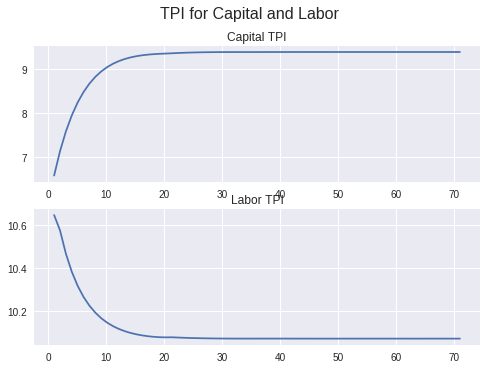

In [81]:


#################### Exercises 3 ##############################
### Helper Code ###

def wage_path(K_guess,L_guess):
    """
    Creates and returns the wage path vector
    Paramaters
    K_guess  = array of n capital guesses
    L_guess  = array of n labor guesses
    """
    return list((1-alpha)*(K_guess/L_guess)**alpha)

def rate_path(K_guess, L_guess):
    """
    Creates and returns the rate path vector
    Paramaters
    K_guess  = array of n capital guesses
    L_guess  = array of n labor guesses
    """
    path = list(alpha*(L_guess/K_guess)**(1-alpha))
    return path

def L2_norm_func(path1, path2):
    """
    Measures the distance between the two calculated TPIs, 
    returns the L2 norm between them.
    Parameters
    path1 = array of S elements
    path2 = array of S elements
    """
    dif = path1 - path2
    sq = dif ** 2
    summed = sq.sum()
    rooted = summed ** .5
    return rooted






def TPI_Euler(guess, wage, rate, kbars, counter):
    '''
    This is a period general version of the equations, that will take in vectors
    for each of the values, and return the same number of equations to optimize. 
    K_guess will be the capital values thus calculated,
    wage will be the wage vector that we can pull wage1, wage2 from
    rate will be the rate vector that we can pull rate1 and rate2 from
    returns an array of S-1 Euler errors to be minimized by an fsolve
    '''

    kbars = np.append(np.array([0.]),kbars)
    k_guess = guess[:counter-1]
    l_guess = guess[counter-1:]
    wage1 = wage[:counter-1]
    wage2 = wage[1:counter]
    rate1 = rate[:counter-1]
    rate2 = rate[1:counter]
    k1 = np.zeros(counter-1)
    k1[0] = kbars[-counter]
    k2 = np.copy(k_guess)
    k3 = np.zeros(counter-1)
    if counter >2: 
        k1[1:] = k_guess[:-1]
        k3[:-1] = k_guess[1:]
    l1 = l_guess[:-1]
    l2 = l_guess[1:]
    w = wage[:counter]
    l = np.copy(l_guess)
    r = rate[:counter]
    lk1 = np.append(k1, k_guess[-1])
    lk2 = np.append(k2, 0)
     



    error1 = ((l1*wage1 + (1+rate1 - delta)*k1-k2)**-gamma - beta * (1+rate2 - delta) * 
            (wage2*l2 + (1+rate2 - delta)*k2 - k3)**-gamma)
    error2 = w*(l*w + (1+r-delta)*lk1-lk2)**-gamma-(1-l)**-gamma

    mask2 = l_guess < 0
    error2[mask2] += 1e12


    return np.append(error1, error2)

def TPI_Euler_2(guess, wage, rate, K_guess_init, counter):
    '''
    This is a period general version of the equations, that will take in vectors
    for each of the values, and return the same number of equations to optimize. 
    K_guess will be the capital values thus calculated,
    wage will be the wage vector that we can pull wage1, wage2 from
    rate will be the rate vector that we can pull rate1 and rate2 from
    '''

    k_guess = guess[:periods-1] 
    l_guess = guess[periods-1:]
    wagess = np.ones(periods + T + 2) * wage[-1]
    ratess = np.ones(periods + T + 2) * rate[-1]
    wagess[:T] = wage
    ratess[:T] = rate
    wage = wagess
    rate = ratess
    wage1 = np.ones(periods-1) * wage[-1]
    wage2 = np.ones(periods-1) * wage[-1]
    wage1 = wage[counter:periods + counter-1]
    wage2 = wage[1+counter:periods+counter]
    rate1 = np.ones(periods-1) * rate[-1]
    rate2 = np.ones(periods-1) * rate[-1]
    rate1 = rate[counter:periods-1 + counter]
    rate2 = rate[1+counter:periods+counter]
    k1 = np.zeros(periods-1)
    k1[1:] = k_guess[:-1]
    k2 = np.copy(k_guess)
    k3 = np.zeros(periods-1)
    k3[:-1] = k_guess[1:]
    l1 = l_guess[:-1]
    l2 = l_guess[1:]
    w = wage[counter+1:counter+1+periods]
    l = np.copy(l_guess)
    r = rate[counter+1:counter+1+periods]
    lk1 = np.append(k1, k_guess[-1])
    lk2 = np.append(k2, 0)

    error1 = ((l1*wage1 + (1+rate1 - delta)*k1-k2)**-gamma - beta * (1+rate2 - delta) * 
            (wage2*l2 + (1+rate2 - delta)*k2 - k3)**-gamma)
    error2 = w*(l*w + (1+r-delta)*lk1-lk2)**-gamma-(1-l)**-gamma

    #mask1 = l_guess < 0
    #error2[mask1] += 1e12
    

    return np.append(error1, error2)

def Scaler_Euler(labor, wage, rate, kap):
    return wage*(labor*wage + (1+rate-delta)*kap)**-gamma-(1-labor)**-gamma

print('Working on TPI...')
K_new = np.linspace(K0, Kss, T)
L_new = np.ones(T)*Lss
iters = 0
while error > epsilon:
    iters += 1
    counter = 2
    K_old = np.copy(K_new)
    L_old = np.copy(L_new)
    wage_guess = np.asarray(wage_path(K_new,L_new))
    rate_guess = np.asarray(rate_path(K_new,L_new))
    K_matrix = np.zeros((T+periods,periods-1))
    K_matrix[0,:] = kshock
    L_matrix = np.zeros((T+periods,periods))
    lcorner = optimize.fsolve(Scaler_Euler, lbars[-1], args =(wage_guess[0], rate_guess[0], kbars[-1]))
    L_matrix[0,-1] = lcorner
    while counter <= periods:
        guess = np.ones(counter*2-1)
        guess[:counter-1] = kbars[periods-counter:]
        guess[counter-1:] = lbars[periods-counter:]
        newvec = optimize.fsolve(TPI_Euler, guess, args = (wage_guess, rate_guess, kshock, counter))
        newk = newvec[:counter-1]
        newl = newvec[counter-1:]
        if counter == periods:
            K_matrix[:periods,:] += np.diag(newk, -1)[:,:-1]
        else:
            K_matrix[1:periods-1, 1:] += np.diag(newk, periods-1-counter)
        L_matrix[:periods,:] += np.diag(newl, periods-counter)
        counter +=1

    for t_period in xrange(T):
        guess = np.ones(periods*2-1)
        guess[:periods-1] = kbars
        guess[periods-1:] = lbars
        newvec = optimize.fsolve(TPI_Euler_2, guess, args = (wage_guess, rate_guess, K_new, t_period))
        newk = newvec[:periods-1]
        newl = newvec[periods-1:]
        K_matrix[t_period+2:periods+t_period+1, :periods] += np.diag(newk, 0)
        L_matrix[t_period+1:periods+t_period+1, :periods]+= np.diag(newl, 0)
        t_period += 1

    K_new = K_matrix.sum(axis = 1)
    K_new = K_new[:T]
    L_new = L_matrix.sum(axis = 1)
    L_new = L_new[:T]
    Kerror = L2_norm_func(K_new, K_old)
    Lerror = L2_norm_func(L_new, L_old)
    error = max(Kerror, Lerror)

    print(error)
    if error > epsilon:
        K_new = xi * K_new + (1-xi) * K_old
        L_new = xi * L_new + (1-xi) * L_old



### Plot this sucker! ###
x = np.linspace(0,T,T)+1
fig = plt.figure()
fig.suptitle("TPI for Capital and Labor", fontsize = 16)

ax = plt.subplot("211")
ax.set_title("Capital TPI")
ax.plot(x,K_new)

ax = plt.subplot("212")
ax.set_title("Labor TPI")
ax.plot(x, L_new)
if show_graph == True:
    plt.show()